

# Project: Medical Appointment No Shows Data Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project I will analyze the data set that contains more than 100K medical appointments in Brazil to investigate the reasons behind no shows


### Questions

<ol>
    <li> Does having chronic disease (Hipertension or Diabetes) encourage to show ?
    <li> Does Gender make a diffrence in showing the patient?
    <li> Does receiving SMS encourage to show ?


In [32]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [33]:
# load the data set
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head(2)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No


In [34]:
df.groupby('No-show').mean()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
No-show,,,,,,,,,
No,1.476845e+14,5.681137e+06,37.790064,0.093903,0.204392,0.073837,0.030417,0.022742,0.291334
Yes,1.467523e+14,5.652259e+06,34.317667,0.115507,0.169004,0.064071,0.030333,0.020297,0.438371


In [35]:
df.shape

(110527, 14)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [37]:
# ensure that there is no nulls
df.isnull().values.sum()

0

In [38]:
# ensure that there is no duplicated rows 
df.duplicated().sum()

0

### we can conclude from the describtion and the info:
<ol>
    <li>There is no nulls </li>
<li>There is wrong value/s in 'Age' column (-1)
    <li>There is no duplicated rows
    </ol>

### Data Cleaning 

In [39]:
# show the rows with wronge Age value 
df.query('Age < 0')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [40]:
# delete that rows 
df.drop(df.query('Age < 0').index, inplace=True)

In [41]:
df.shape

(110526, 14)

In [42]:
df.Age.min()

0

In [43]:
# we dont need {PatentId, AppointemtID, Neighbourhood, ScheduledDay, AppointmentDay}
df.drop(['PatientId', 'AppointmentID', 'Neighbourhood','ScheduledDay','AppointmentDay'], axis='columns', inplace=True)

In [44]:
# rename (no-show) to avoid confuion 
df.rename(columns = {'No-show': 'Show'}, inplace = True)

In [45]:
# convert Show column to int to ease the manipulation
# replace Yes(he is no show) with 0, and No (he is show) with 1 to mach the column name  
df = df.replace("Yes", 0, regex=True)
df = df.replace("No", 1, regex=True)

In [46]:
# correct the typo in (handcap)
df.rename(columns = {'Handcap': 'Handicap'}, inplace = True)

<a id='eda'></a>
## Exploratory Data Analysis

I will take 'Show' property as independent


In [47]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(4)

,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handicap,SMS_received,Show
Age,1.0000,-0.0925,0.5046,0.2924,0.0958,0.0780,0.0126,0.0603
Scholarship,-0.0925,1.0000,-0.0197,-0.0249,0.0350,-0.0086,0.0012,-0.0291
Hipertension,0.5046,-0.0197,1.0000,0.4331,0.0880,0.0801,-0.0063,0.0357
Diabetes,0.2924,-0.0249,0.4331,1.0000,0.0185,0.0575,-0.0146,0.0152
Alcoholism,0.0958,0.0350,0.0880,0.0185,1.0000,0.0046,-0.0261,0.0002
Handicap,0.0780,-0.0086,0.0801,0.0575,0.0046,1.0000,-0.0242,0.0061
SMS_received,0.0126,0.0012,-0.0063,-0.0146,-0.0261,-0.0242,1.0000,-0.1264
Show,0.0603,-0.0291,0.0357,0.0152,0.0002,0.0061,-0.1264,1.0000



### Does having chronic disease (Hipertension or Diabetes) encourage to show ?

In [48]:
# find patient who have any chronic diseases
chronic=df.query('Diabetes ==1 | Hipertension==1')

#find patient who doesnt have any chronic diseases
not_chronic=df.query('Diabetes != 1 & Hipertension !=1')

In [49]:
chronic.Show.mean()

0.8253934130191762

In [50]:
not_chronic.Show.mean()

0.7907824173809415

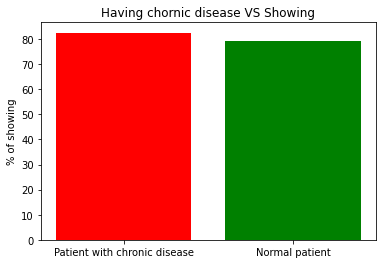

In [51]:
chronic_mean = chronic["Show"].mean()*100
not_chronic_mean = not_chronic.Show.mean()*100
means = [chronic_mean, not_chronic_mean]
index = ["Patient with chronic disease","Normal patient"]

plt.title("Having chornic disease VS Showing")
plt.ylabel('% of showing')
plt.bar(index, means, color=[ 'red', 'green'])

plt.xticks(index)
plt.show()

#### Answer:
> As we can see, patient with chronic disease are more showing 

 
 
 
### Are olds people more eager than younge to show ?

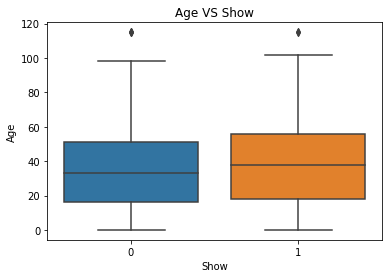

In [52]:
sns.boxplot( x=df["Show"], y=df["Age"] );
plt.title('Age VS Show');

#### Answer:
> Yes, they are.

### Does receiving SMS encourage to show ?

In [53]:
def relationWithShowing (Column, Title, XLabel):
    df.groupby(Column).Show.mean().plot(kind="bar");
    plt.ylabel('Showing')
    plt.xlabel(XLabel)
    plt.title(Title);
    plt.xticks(rotation=360)
    plt.subplots_adjust(bottom= 0.2, top = 0.98)
    plt.show()

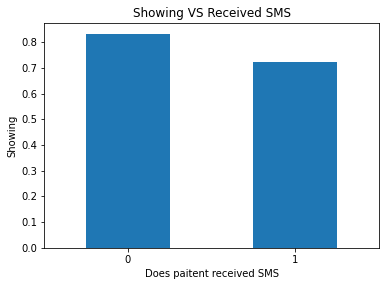

In [54]:
relationWithShowing('SMS_received', 'Showing VS Received SMS', 'Does paitent received SMS')

#### Answer: 
> unfortunately, it's not. We need to use another way to reminder our patients

### Does Gender make a diffrence in showing the patient?

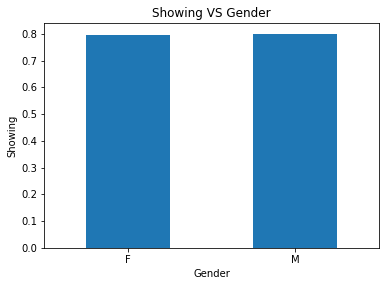

In [55]:
relationWithShowing('Gender', 'Showing VS Gender', 'Gender')

#### Answer: 
> As shown, the is no big difference

<a id='conclusions'></a>
## Conclusions

Based on the analysis above, we can see that most people in this data are between 20 and 60. Most of them was shown to their appointments.

People who have a chronic disease are more likely to show than others. Older people are more likely to show than youngs. However, Gender does not make a difference, and recieving SMS may affect negitavly.


Therefore, a 50-year-old patient or above and has a chronic disease usually will show to the appointment.


This analysis also has some limitations. It analyze a sample in Brazil, where maybe an external factors. In addition, there is no mintion about factors that will make a big diffrence like class of the patient, how he scheduled his appointmen, and other factors.

There are also further exploration can be done. For example, the period between scheduled day and appointment day could influence the show of the patient, and the neighbourhood of the patient as well.